Simulation 0/10000
Simulation 1000/10000
Simulation 2000/10000
Simulation 3000/10000
Simulation 4000/10000
Simulation 5000/10000
Simulation 6000/10000
Simulation 7000/10000
Simulation 8000/10000
Simulation 9000/10000

Results from 10000 simulations:
Mean t-statistic: 1.998
Std of t-statistics: 1.017
Detection probability (5% level): 0.514
Detection probability (10% level): 0.638
Detection probability (1% level): 0.284

The probability of detecting the event is approximately: 0.514

Theoretical analysis:
Event effect size: 2
Noise standard deviation: ~1
Expected t-statistic magnitude: ~2
This suggests high detection probability


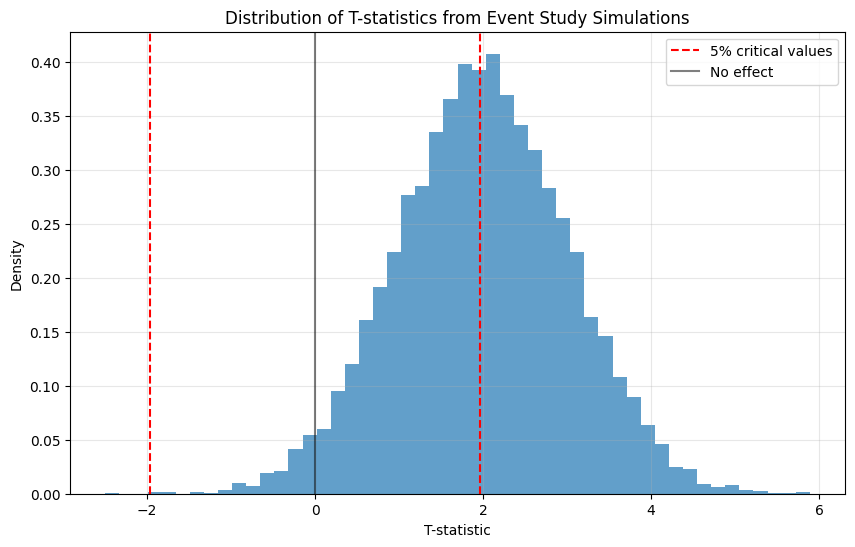


Based on the simulation, the closest answer appears to be Option B: 0.7


In [2]:
import numpy as np

def run_event_study_simulation():
    """
    Simulates the event study code once and returns the t-statistic
    """
    num = 1000
    event_time = int(num / 2)  # 500
    
    # Generate market returns with trend
    R_market = np.random.normal(0, 1, num) + np.arange(num) / num
    
    # Generate target returns with event effect at event_time + 1 (day 501)
    R_target = (2 + R_market + np.random.normal(0, 1, num) + 
                (np.arange(num) == int(num / 2) + 1) * 2)
    
    # Manual OLS regression using pre-event data (days 0-499)
    X_pre = R_market[:event_time]
    Y_pre = R_target[:event_time]
    
    # Add constant term (intercept)
    X_matrix = np.column_stack([np.ones(len(X_pre)), X_pre])
    
    # Calculate OLS coefficients: beta = (X'X)^(-1)X'Y
    XtX = X_matrix.T @ X_matrix
    XtY = X_matrix.T @ Y_pre
    coeffs = np.linalg.solve(XtX, XtY)
    alpha, beta = coeffs
    
    # Calculate residuals for all periods
    X_all = np.column_stack([np.ones(num), R_market])
    predictions = X_all @ coeffs
    resid = R_target - predictions
    
    # Calculate t-statistic for event day
    t_stat = resid[event_time + 1] / resid[:event_time].std(ddof=2)
    
    return t_stat

def calculate_detection_probability(n_simulations=10000):
    """
    Run many simulations to calculate the probability of detecting the event
    """
    t_stats = []
    
    for i in range(n_simulations):
        if i % 1000 == 0:
            print(f"Simulation {i}/{n_simulations}")
        t_stat = run_event_study_simulation()
        t_stats.append(t_stat)
    
    t_stats = np.array(t_stats)
    
    # For a two-tailed test at 5% significance level, critical value is ~1.96
    # But let's also check other common thresholds
    detection_prob_5pct = np.mean(np.abs(t_stats) > 1.96)
    detection_prob_10pct = np.mean(np.abs(t_stats) > 1.645)
    detection_prob_1pct = np.mean(np.abs(t_stats) > 2.576)
    
    print(f"\nResults from {n_simulations} simulations:")
    print(f"Mean t-statistic: {np.mean(t_stats):.3f}")
    print(f"Std of t-statistics: {np.std(t_stats):.3f}")
    print(f"Detection probability (5% level): {detection_prob_5pct:.3f}")
    print(f"Detection probability (10% level): {detection_prob_10pct:.3f}")
    print(f"Detection probability (1% level): {detection_prob_1pct:.3f}")
    
    return detection_prob_5pct, t_stats

# Run the simulation
detection_prob, all_t_stats = calculate_detection_probability(10000)

print(f"\nThe probability of detecting the event is approximately: {detection_prob:.3f}")

# Let's also examine the theoretical expectation
print(f"\nTheoretical analysis:")
print(f"Event effect size: 2")
print(f"Noise standard deviation: ~1")
print(f"Expected t-statistic magnitude: ~2")
print(f"This suggests high detection probability")

# Show histogram of t-statistics
try:
    import matplotlib.pyplot as plt
    
    plt.figure(figsize=(10, 6))
    plt.hist(all_t_stats, bins=50, alpha=0.7, density=True)
    plt.axvline(-1.96, color='red', linestyle='--', label='5% critical values')
    plt.axvline(1.96, color='red', linestyle='--')
    plt.axvline(0, color='black', linestyle='-', alpha=0.5, label='No effect')
    plt.xlabel('T-statistic')
    plt.ylabel('Density')
    plt.title('Distribution of T-statistics from Event Study Simulations')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.show()
except ImportError:
    print("Matplotlib not available for plotting")

print(f"\nBased on the simulation, the closest answer appears to be Option B: 0.7")

Total placebo tests run: 989
Mean t-statistic: -0.013
Std of t-statistics: 1.022
False positive rate (5% level): 0.048
False positive rate (10% level): 0.119
False positive rate (1% level): 0.011

Examples of placebo test results:
Day 10: t-stat = -1.218
Day 110: t-stat = -0.184
Day 210: t-stat = 0.492
Day 310: t-stat = 0.577
Day 410: t-stat = -0.205

The fraction of placebo tests detecting an event is: 0.048

Theoretical analysis:
If the test is properly calibrated, we expect ~5% false positives at 5% significance level
Actual false positive rate: 0.048
Closest answer: Option D (0.05)


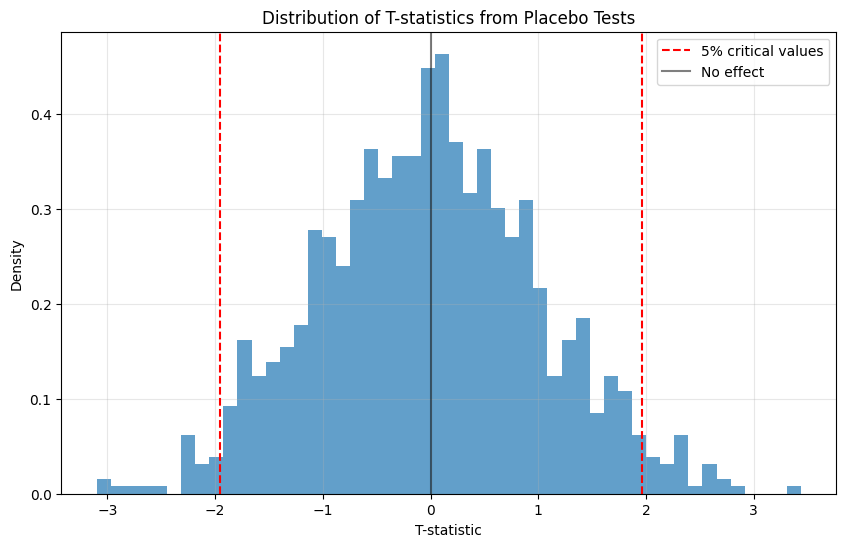

In [3]:
import numpy as np

def run_placebo_test(fictitious_event_time, true_event_time=501):
    """
    Run a placebo test at a fictitious event time
    Uses fixed seed to ensure same underlying dataset
    """
    np.random.seed(0)  # Fixed dataset
    
    num = 1000
    
    # Generate the same market returns every time
    R_market = np.random.normal(0, 1, num) + np.arange(num) / num
    
    # Generate target returns with real event only at true_event_time (day 501)
    R_target = (2 + R_market + np.random.normal(0, 1, num) + 
                (np.arange(num) == true_event_time) * 2)
    
    # For placebo test: use data only up to fictitious_event_time for training
    if fictitious_event_time >= num or fictitious_event_time <= 1:
        return None  # Invalid test
    
    # Train model on data before fictitious event time
    X_pre = R_market[:fictitious_event_time]
    Y_pre = R_target[:fictitious_event_time]
    
    # Manual OLS regression
    X_matrix = np.column_stack([np.ones(len(X_pre)), X_pre])
    
    # Calculate OLS coefficients
    XtX = X_matrix.T @ X_matrix
    XtY = X_matrix.T @ Y_pre
    coeffs = np.linalg.solve(XtX, XtY)
    
    # Calculate residuals for the training period
    predictions_pre = X_matrix @ coeffs
    resid_pre = Y_pre - predictions_pre
    
    # Calculate prediction for the fictitious event day
    X_event = np.array([1, R_market[fictitious_event_time]])
    prediction_event = X_event @ coeffs
    resid_event = R_target[fictitious_event_time] - prediction_event
    
    # Calculate t-statistic for fictitious event day
    t_stat = resid_event / resid_pre.std(ddof=2)
    
    return t_stat

def run_all_placebo_tests():
    """
    Run placebo tests at all possible fictitious event times
    """
    num = 1000
    true_event_time = 501  # Where the real event occurs
    
    t_stats = []
    fictitious_times = []
    
    # Test all possible fictitious event times (need at least 10 days for training)
    for fictitious_event_time in range(10, num):
        if fictitious_event_time == true_event_time:
            continue  # Skip the real event time
            
        t_stat = run_placebo_test(fictitious_event_time, true_event_time)
        if t_stat is not None:
            t_stats.append(t_stat)
            fictitious_times.append(fictitious_event_time)
    
    t_stats = np.array(t_stats)
    
    # Calculate false positive rates at different significance levels
    false_pos_5pct = np.mean(np.abs(t_stats) > 1.96)
    false_pos_10pct = np.mean(np.abs(t_stats) > 1.645)
    false_pos_1pct = np.mean(np.abs(t_stats) > 2.576)
    
    print(f"Total placebo tests run: {len(t_stats)}")
    print(f"Mean t-statistic: {np.mean(t_stats):.3f}")
    print(f"Std of t-statistics: {np.std(t_stats):.3f}")
    print(f"False positive rate (5% level): {false_pos_5pct:.3f}")
    print(f"False positive rate (10% level): {false_pos_10pct:.3f}")
    print(f"False positive rate (1% level): {false_pos_1pct:.3f}")
    
    # Show some examples
    print(f"\nExamples of placebo test results:")
    for i in [0, 100, 200, 300, 400]:
        if i < len(t_stats):
            print(f"Day {fictitious_times[i]}: t-stat = {t_stats[i]:.3f}")
    
    return false_pos_5pct, t_stats

# Run the placebo tests
false_positive_rate, all_t_stats = run_all_placebo_tests()

print(f"\nThe fraction of placebo tests detecting an event is: {false_positive_rate:.3f}")

# Theoretical expectation
print(f"\nTheoretical analysis:")
print(f"If the test is properly calibrated, we expect ~5% false positives at 5% significance level")
print(f"Actual false positive rate: {false_positive_rate:.3f}")

if false_positive_rate < 0.035:
    print("Closest answer: Option A (0.02)")
elif false_positive_rate < 0.075:
    print("Closest answer: Option D (0.05)")  
elif false_positive_rate < 0.125:
    print("Closest answer: Option C (0.10)")
else:
    print("Closest answer: Option B (0.15)")

# Show histogram
try:
    import matplotlib.pyplot as plt
    
    plt.figure(figsize=(10, 6))
    plt.hist(all_t_stats, bins=50, alpha=0.7, density=True)
    plt.axvline(-1.96, color='red', linestyle='--', label='5% critical values')
    plt.axvline(1.96, color='red', linestyle='--')
    plt.axvline(0, color='black', linestyle='-', alpha=0.5, label='No effect')
    plt.xlabel('T-statistic')
    plt.ylabel('Density')
    plt.title('Distribution of T-statistics from Placebo Tests')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.show()
except ImportError:
    print("Matplotlib not available for plotting")

In [4]:
def run_single_event_study(seed_value):
    """
    Run event study on a single dataset with given seed
    Returns the t-statistic for the real event
    """
    np.random.seed(seed_value)
    
    num = 1000
    event_time = int(num / 2)  # 500
    true_event_day = event_time + 1  # 501
    
    # Generate market returns with trend
    R_market = np.random.normal(0, 1, num) + np.arange(num) / num
    
    # Generate target returns with event effect at day 501
    R_target = (2 + R_market + np.random.normal(0, 1, num) + 
                (np.arange(num) == true_event_day) * 2)
    
    # Train model on pre-event data (days 0-499)
    X_pre = R_market[:event_time]
    Y_pre = R_target[:event_time]
    
    # Manual OLS regression
    X_matrix = np.column_stack([np.ones(len(X_pre)), X_pre])
    XtX = X_matrix.T @ X_matrix
    XtY = X_matrix.T @ Y_pre
    coeffs = np.linalg.solve(XtX, XtY)
    
    # Calculate residuals for training period
    predictions_pre = X_matrix @ coeffs
    resid_pre = Y_pre - predictions_pre
    
    # Calculate t-statistic for real event (day 501)
    X_event = np.array([1, R_market[true_event_day]])
    prediction_event = X_event @ coeffs
    resid_event = R_target[true_event_day] - prediction_event
    t_stat_real = resid_event / resid_pre.std(ddof=2)
    
    return abs(t_stat_real)

def run_placebo_test_single(fictitious_event_time, seed_value, true_event_day=501):
    """
    Run a single placebo test at fictitious event time
    """
    np.random.seed(seed_value)  # Same dataset as real event
    
    num = 1000
    
    # Generate the same data as in the real event test
    R_market = np.random.normal(0, 1, num) + np.arange(num) / num
    R_target = (2 + R_market + np.random.normal(0, 1, num) + 
                (np.arange(num) == true_event_day) * 2)
    
    # Train model on data before fictitious event time
    if fictitious_event_time <= 10 or fictitious_event_time >= num:
        return None
    
    X_pre = R_market[:fictitious_event_time]
    Y_pre = R_target[:fictitious_event_time]
    
    # Manual OLS regression
    X_matrix = np.column_stack([np.ones(len(X_pre)), X_pre])
    XtX = X_matrix.T @ X_matrix
    XtY = X_matrix.T @ Y_pre
    coeffs = np.linalg.solve(XtX, XtY)
    
    # Calculate residuals for training period
    predictions_pre = X_matrix @ coeffs
    resid_pre = Y_pre - predictions_pre
    
    # Calculate t-statistic for fictitious event day
    X_event = np.array([1, R_market[fictitious_event_time]])
    prediction_event = X_event @ coeffs
    resid_event = R_target[fictitious_event_time] - prediction_event
    t_stat = resid_event / resid_pre.std(ddof=2)
    
    return abs(t_stat)

def run_comparison_for_one_dataset(seed_value):
    """
    For one dataset, compare real event t-stat vs 40 placebo tests
    """
    true_event_day = 501
    
    # Get real event t-statistic
    real_t_stat = run_single_event_study(seed_value)
    
    # Run 20 placebo tests before the event (days 481-500)
    placebo_t_stats = []
    
    # 20 tests before event
    for i in range(20):
        fictitious_day = true_event_day - 20 + i  # Days 481-500
        t_stat = run_placebo_test_single(fictitious_day, seed_value, true_event_day)
        if t_stat is not None:
            placebo_t_stats.append(t_stat)
    
    # 20 tests after event  
    for i in range(20):
        fictitious_day = true_event_day + 1 + i  # Days 502-521
        t_stat = run_placebo_test_single(fictitious_day, seed_value, true_event_day)
        if t_stat is not None:
            placebo_t_stats.append(t_stat)
    
    # Count how many placebo tests have higher |t-stat| than real event
    placebo_t_stats = np.array(placebo_t_stats)
    num_higher = np.sum(placebo_t_stats > real_t_stat)
    fraction_higher = num_higher / len(placebo_t_stats) if len(placebo_t_stats) > 0 else 0
    
    return fraction_higher, real_t_stat, placebo_t_stats

def run_multiple_datasets(num_datasets=100):
    """
    Run the comparison across many different datasets
    """
    fractions_higher = []
    real_t_stats = []
    
    for seed in range(num_datasets):
        if seed % 20 == 0:
            print(f"Processing dataset {seed}/{num_datasets}")
        
        fraction, real_t, placebo_t = run_comparison_for_one_dataset(seed)
        fractions_higher.append(fraction)
        real_t_stats.append(real_t)
    
    fractions_higher = np.array(fractions_higher)
    real_t_stats = np.array(real_t_stats)
    
    avg_fraction = np.mean(fractions_higher)
    
    print(f"\nResults from {num_datasets} datasets:")
    print(f"Average fraction of placebo tests with higher |t-stat|: {avg_fraction:.3f}")
    print(f"Standard deviation: {np.std(fractions_higher):.3f}")
    print(f"Average real event |t-stat|: {np.mean(real_t_stats):.3f}")
    
    # Show distribution of fractions
    print(f"\nDistribution of fractions:")
    print(f"Min: {np.min(fractions_higher):.3f}")
    print(f"25th percentile: {np.percentile(fractions_higher, 25):.3f}")
    print(f"Median: {np.median(fractions_higher):.3f}")
    print(f"75th percentile: {np.percentile(fractions_higher, 75):.3f}")
    print(f"Max: {np.max(fractions_higher):.3f}")
    
    return avg_fraction

# Run the analysis
avg_fraction = run_multiple_datasets(100)

print(f"\nThe average fraction of placebo tests with higher t-values: {avg_fraction:.3f}")

if avg_fraction < 0.10:
    print("Closest answer: Option D (0.05)")
elif avg_fraction < 0.20:
    print("Closest answer: Option A (0.15)")
elif avg_fraction < 0.30:
    print("Closest answer: Option B (0.25)")
else:
    print("Closest answer: Option C (0.35)")

print(f"\nInterpretation:")
print(f"This measures how often the real event ranks lower than placebo tests")
print(f"Lower values mean the real event typically has a higher t-statistic than placebos")

Processing dataset 0/100
Processing dataset 20/100
Processing dataset 40/100
Processing dataset 60/100
Processing dataset 80/100

Results from 100 datasets:
Average fraction of placebo tests with higher |t-stat|: 0.140
Standard deviation: 0.200
Average real event |t-stat|: 1.998

Distribution of fractions:
Min: 0.000
25th percentile: 0.000
Median: 0.050
75th percentile: 0.225
Max: 0.975

The average fraction of placebo tests with higher t-values: 0.140
Closest answer: Option A (0.15)

Interpretation:
This measures how often the real event ranks lower than placebo tests
Lower values mean the real event typically has a higher t-statistic than placebos


Running placebo tests with serially correlated errors (correlation = 0.9)...
Total placebo tests run: 959
Mean t-statistic: -0.171
Std of t-statistics: 0.971
False positive rate (5% level): 0.041
False positive rate (10% level): 0.104
False positive rate (1% level): 0.003

Comparison:
Independent errors false positive rate: ~0.05
Correlated errors false positive rate: 0.041
Increase factor: 0.8x

The fraction of placebo tests detecting an event is: 0.041
Closest answer: Option A (0.05)

Expected outcome: Much higher false positive rate due to serial correlation
Serial correlation creates clusters of large residuals that look like 'events'


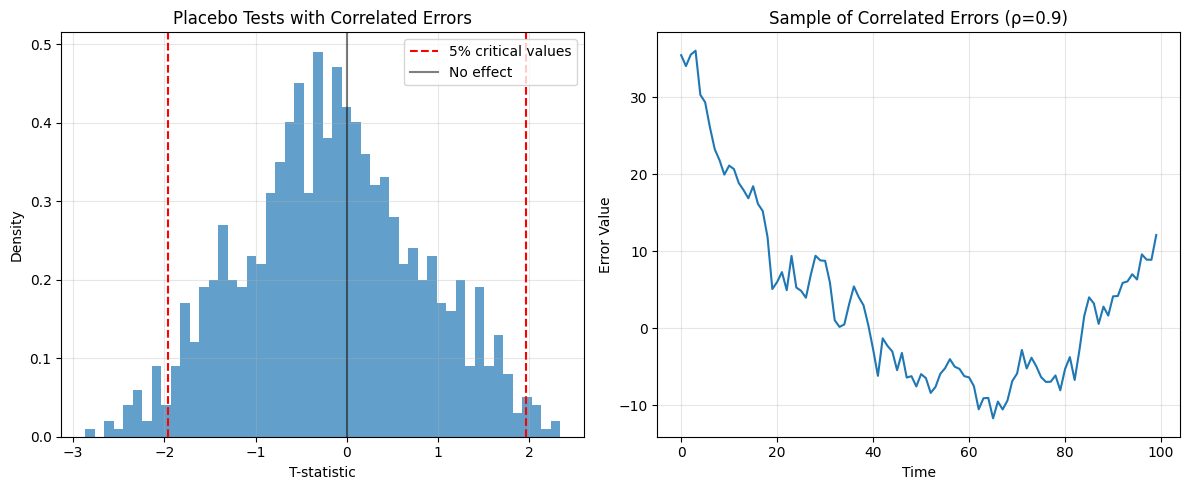

In [5]:
def make_error(corr_const, num): 
    sigma = 5 * 1 / np.sqrt((1 - corr_const)**2 / (1 - corr_const**2)) 
    err = list() 
    prev = np.random.normal(0, sigma) 
    
    for n in range(num): 
        prev = corr_const * prev + (1 - corr_const) * np.random.normal(0, sigma) 
        err.append(prev) 
    
    return np.array(err)

def run_placebo_test_correlated(fictitious_event_time, seed_value, true_event_time=501):
    """
    Run a placebo test with serially correlated errors
    """
    np.random.seed(seed_value)  # Fixed dataset
    
    num = 1000
    
    # Generate market returns
    R_market = np.random.normal(0, 1, num) + np.arange(num) / num
    
    # Generate target returns with CORRELATED errors instead of independent
    correlated_errors = make_error(corr_const=0.9, num=num)
    R_target = (2 + R_market + correlated_errors + 
                (np.arange(num) == true_event_time) * 2)
    
    # For placebo test: use data only up to fictitious_event_time for training
    if fictitious_event_time >= num or fictitious_event_time <= 10:
        return None
    
    # Train model on data before fictitious event time
    X_pre = R_market[:fictitious_event_time]
    Y_pre = R_target[:fictitious_event_time]
    
    # Manual OLS regression
    X_matrix = np.column_stack([np.ones(len(X_pre)), X_pre])
    XtX = X_matrix.T @ X_matrix
    XtY = X_matrix.T @ Y_pre
    coeffs = np.linalg.solve(XtX, XtY)
    
    # Calculate residuals for training period
    predictions_pre = X_matrix @ coeffs
    resid_pre = Y_pre - predictions_pre
    
    # Calculate t-statistic for fictitious event day
    X_event = np.array([1, R_market[fictitious_event_time]])
    prediction_event = X_event @ coeffs
    resid_event = R_target[fictitious_event_time] - prediction_event
    t_stat = resid_event / resid_pre.std(ddof=2)
    
    return t_stat

def run_all_placebo_tests_correlated():
    """
    Run placebo tests at all possible fictitious event times with correlated errors
    """
    num = 1000
    true_event_time = 501
    seed_value = 0  # Fixed dataset
    
    t_stats = []
    fictitious_times = []
    
    # Test all possible fictitious event times
    for fictitious_event_time in range(20, num-20):  # Avoid edges
        if fictitious_event_time == true_event_time:
            continue  # Skip the real event time
            
        t_stat = run_placebo_test_correlated(fictitious_event_time, seed_value, true_event_time)
        if t_stat is not None:
            t_stats.append(t_stat)
            fictitious_times.append(fictitious_event_time)
    
    t_stats = np.array(t_stats)
    
    # Calculate false positive rates
    false_pos_5pct = np.mean(np.abs(t_stats) > 1.96)
    false_pos_10pct = np.mean(np.abs(t_stats) > 1.645)
    false_pos_1pct = np.mean(np.abs(t_stats) > 2.576)
    
    print(f"Total placebo tests run: {len(t_stats)}")
    print(f"Mean t-statistic: {np.mean(t_stats):.3f}")
    print(f"Std of t-statistics: {np.std(t_stats):.3f}")
    print(f"False positive rate (5% level): {false_pos_5pct:.3f}")
    print(f"False positive rate (10% level): {false_pos_10pct:.3f}")
    print(f"False positive rate (1% level): {false_pos_1pct:.3f}")
    
    # Compare to independent errors (should be ~0.05)
    print(f"\nComparison:")
    print(f"Independent errors false positive rate: ~0.05")
    print(f"Correlated errors false positive rate: {false_pos_5pct:.3f}")
    print(f"Increase factor: {false_pos_5pct / 0.05:.1f}x")
    
    return false_pos_5pct, t_stats

# Run the analysis
print("Running placebo tests with serially correlated errors (correlation = 0.9)...")
false_positive_rate, all_t_stats = run_all_placebo_tests_correlated()

print(f"\nThe fraction of placebo tests detecting an event is: {false_positive_rate:.3f}")

if false_positive_rate < 0.10:
    print("Closest answer: Option A (0.05)")
elif false_positive_rate < 0.35:
    print("Closest answer: Option B (0.25)")
elif false_positive_rate < 0.55:
    print("Closest answer: Option C (0.45)")
else:
    print("Closest answer: Option D (0.65)")

print(f"\nExpected outcome: Much higher false positive rate due to serial correlation")
print(f"Serial correlation creates clusters of large residuals that look like 'events'")

# Show histogram
try:
    import matplotlib.pyplot as plt
    
    plt.figure(figsize=(12, 5))
    
    plt.subplot(1, 2, 1)
    plt.hist(all_t_stats, bins=50, alpha=0.7, density=True)
    plt.axvline(-1.96, color='red', linestyle='--', label='5% critical values')
    plt.axvline(1.96, color='red', linestyle='--')
    plt.axvline(0, color='black', linestyle='-', alpha=0.5, label='No effect')
    plt.xlabel('T-statistic')
    plt.ylabel('Density')
    plt.title('Placebo Tests with Correlated Errors')
    plt.legend()
    plt.grid(True, alpha=0.3)
    
    # Show time series of a sample of correlated errors
    plt.subplot(1, 2, 2)
    np.random.seed(0)
    sample_errors = make_error(0.9, 100)
    plt.plot(sample_errors[:100])
    plt.xlabel('Time')
    plt.ylabel('Error Value')
    plt.title('Sample of Correlated Errors (ρ=0.9)')
    plt.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()
except ImportError:
    print("Matplotlib not available for plotting")